Find the regression model that fits the best the data given.

## Arturo Efren Jimenez Garibaldy A00824428
## Roberto Rivera Terán A00369870

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df_team = pd.read_csv('team-data.csv')

### Brief description of data

In [3]:
# Show only the first five values
df.head()

,X,Date,Efren,Robert,Pepe
0,0,15/04/2020,7,10,9
1,1,16/04/2020,7,10,10
2,2,17/04/2020,7,10,12
3,3,18/04/2020,8,12,12
4,4,19/04/2020,9,12,13


In [4]:
# Description of data X, Y
df.describe()

,X,Efren,Robert,Pepe
count,47.000000,47.000000,47.000000,47.000000
mean,23.000000,25.531915,29.212766,31.893617
std,13.711309,11.959808,10.691191,13.748097
min,0.000000,7.000000,10.000000,9.000000
25%,11.500000,15.000000,24.000000,19.500000
50%,23.000000,24.000000,30.000000,33.000000
75%,34.500000,36.500000,35.000000,43.500000
max,46.000000,45.000000,50.000000,55.000000


### Distribution plot of the dataset

**Efren**

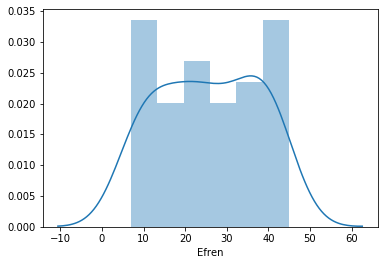

In [5]:
sns.distplot(df['Efren'], bins=6)

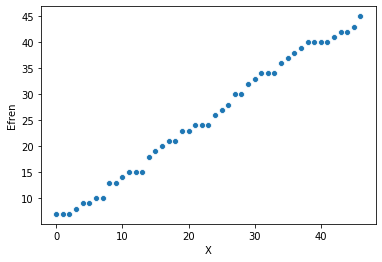

In [6]:
sp = sns.scatterplot(x = 'X', y = 'Efren', data = df)

**Robert**

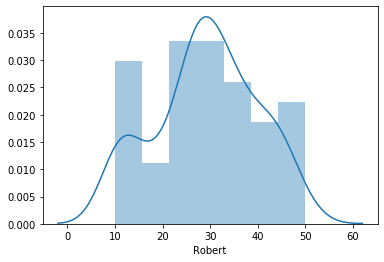

In [7]:
# Robert
sns.distplot(df['Robert'])

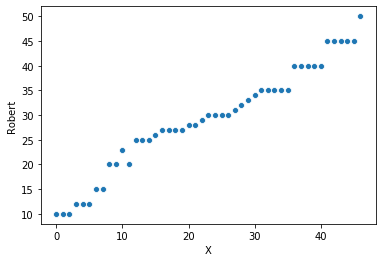

In [8]:
sp = sns.scatterplot(x = 'X', y = 'Robert', data = df)

**Pepe**

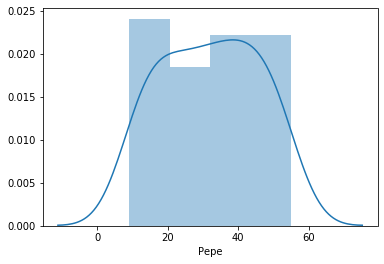

In [9]:
# Pepe
sns.distplot(df['Pepe'])

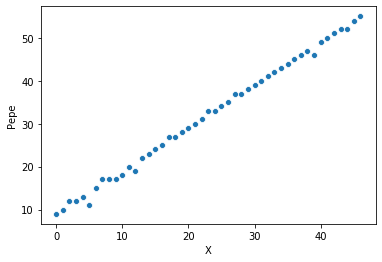

In [10]:
sp = sns.scatterplot(x = 'X', y = 'Pepe', data = df)

***Team***

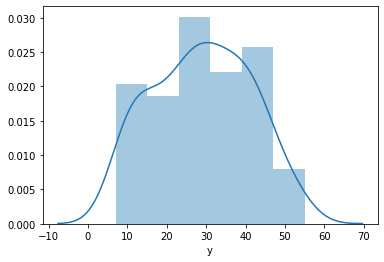

In [11]:
sns.distplot(df_team['y'])

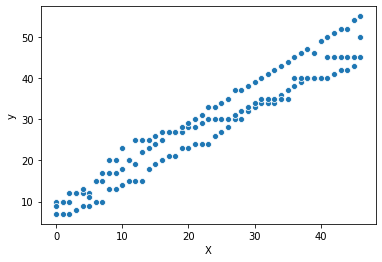

In [12]:
sp = sns.scatterplot(x = 'X', y = 'y', data = df_team)

## Linear Regression Model

First we are going to use a Simple Linear Regression

In [13]:
from scipy import stats

In [14]:
def linear_regression(x_tag, y_tag, data_ref):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_ref[x_tag], data_ref[y_tag])
    
    # use line_kws to set line label for legend
    ax = sns.regplot(x=x_tag, y=y_tag, data=data_ref, color='b', 
     line_kws={'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})

    # plot legend
    ax.legend()

    plt.show()
    
    # linear stats
    print("R^2: ", r_value**2)
    print("Standard error: ", std_err)
    print("P value: ", p_value)

#### Efren - Individual Linear Regression

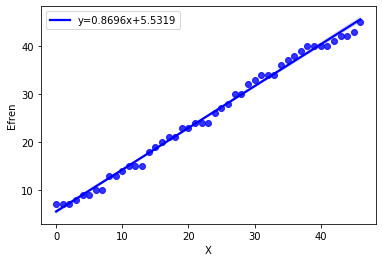

R^2:  0.9938338100889988
Standard error:  0.01021051075873173
P value:  2.2365943663456797e-51


In [15]:
linear_regression('X', 'Efren', df)

#### Robert - Individual Linear Regression

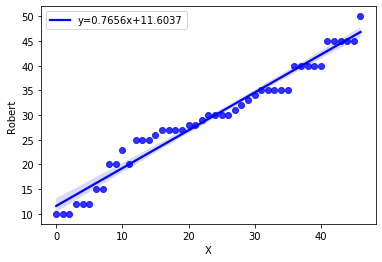

R^2:  0.9640986116584789
Standard error:  0.022024017479429503
P value:  3.7198040106643568e-34


In [16]:
linear_regression('X', 'Robert', df)

#### Pepe - Individual Linear Regression

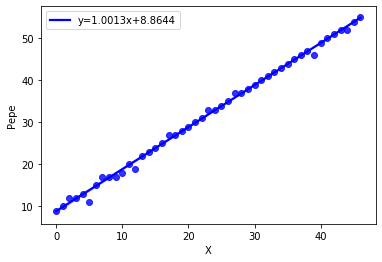

R^2:  0.9971873962624694
Standard error:  0.00792705161922499
P value:  4.769239929234078e-59


In [17]:
linear_regression('X', 'Pepe', df)

#### Team - Linear Regression 

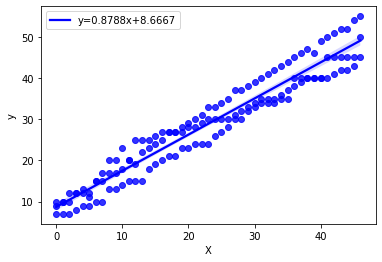

R^2:  0.9323460547155414
Standard error:  0.02007929713159918
P value:  3.54823323399327e-83


In [18]:
linear_regression('X', 'y', df_team)

## Non-Linear Model - Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Visualizing the Polynomial Regression results
def viz_polynomial(X, y, y_pred):
    plt.scatter(X, y, color='red')
    plt.plot(X, y_pred, color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [21]:
# Creating Polynomial regression of degree n
def pol_regression(X, y, n):
    poly_reg = PolynomialFeatures(degree=n)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    y_pred = pol_reg.predict(X_poly)
    return pol_reg, X_poly, y_pred

In [22]:
# Polynomial regression results
def pol_regression_res(X, y, degree):
    # Fitting Polynomial Regression to the dataset
    pol_reg, X_poly, y_pred = pol_regression(X, y, degree)
    viz_polynomial(X, y, y_pred)
    print('R^2:', r2_score(y, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

#### Efren - Individual Polynomial Regression

In [23]:
X_efren = df[['X']]
y_efren = df['Efren']

#### Polynomial Regression - Order 2

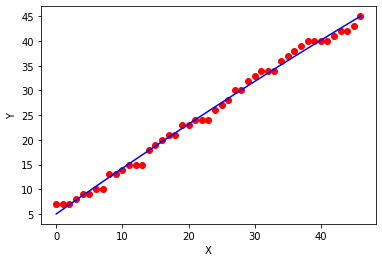

R^2: 0.9942644885649616
RMSE: 0.8960665437905833


In [24]:
pol_regression_res(X_efren, y_efren, 2)

#### Polynomial Regression - Order 3

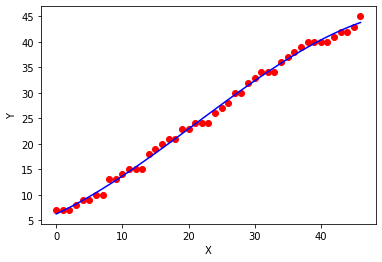

R^2: 0.996268019739191
RMSE: 0.7228095076207723


In [25]:
pol_regression_res(X_efren, y_efren, 3)

#### Polynomial Regression - Order 5

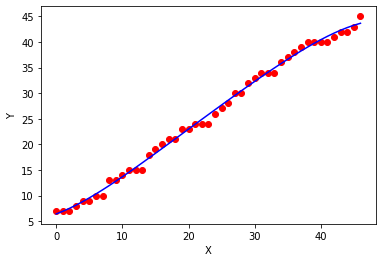

R^2: 0.9962970290226906
RMSE: 0.7199947697514635


In [26]:
pol_regression_res(X_efren, y_efren, 5)

#### Polynomial Regression - Order 9

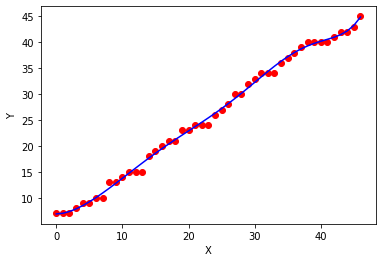

R^2: 0.9974580601480771
RMSE: 0.5965362262203181


In [27]:
pol_regression_res(X_efren, y_efren, 9)

#### Robert - Individual Polynomial Regression

In [28]:
X_robert = df[['X']]
y_robert = df['Robert']

#### Polynomial Regression - Order 2

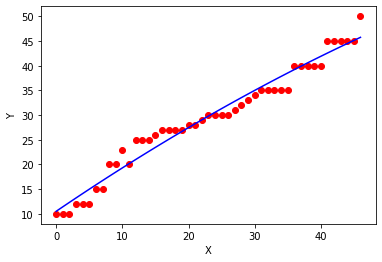

R^2: 0.9664696648783516
RMSE: 1.9367565648571634


In [29]:
pol_regression_res(X_robert, y_robert, 2)

#### Polynomial Regression - Order 3

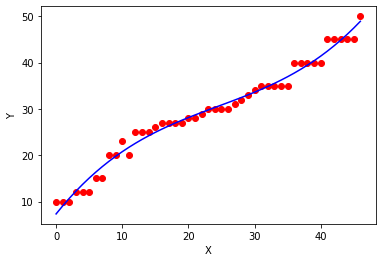

R^2: 0.9831250610730052
RMSE: 1.3739698239943785


In [30]:
pol_regression_res(X_robert, y_robert, 3)

#### Polynomial Regression - Order 5

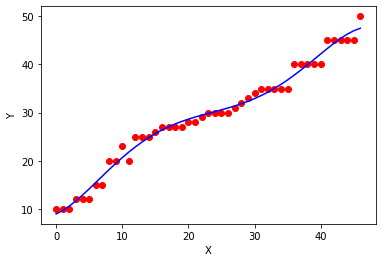

R^2: 0.9866534897768627
RMSE: 1.2219120606258764


In [31]:
pol_regression_res(X_robert, y_robert, 5)

#### Polynomial Regression - Order 9

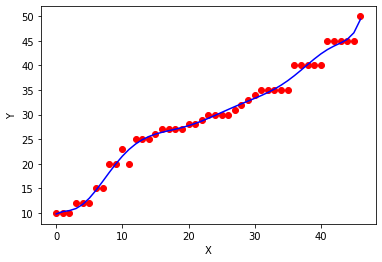

R^2: 0.9905721765465886
RMSE: 1.02697958468705


In [32]:
pol_regression_res(X_robert, y_robert, 9)

#### Pepe - Individual Polynomial Regression

In [33]:
X_pepe = df[['X']]
y_pepe = df['Pepe']

#### Polynomial Regression - Order 2

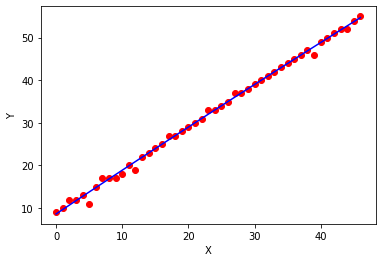

R^2: 0.9972547785201378
RMSE: 0.7126253610240784


In [34]:
pol_regression_res(X_pepe, y_pepe, 2)

#### Polynomial Regression - Order 3

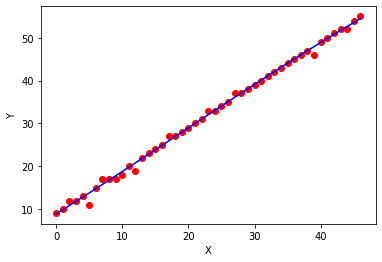

R^2: 0.9973125614644415
RMSE: 0.705085607871584


In [35]:
pol_regression_res(X_pepe, y_pepe, 3)

#### Polynomial Regression - Order 5

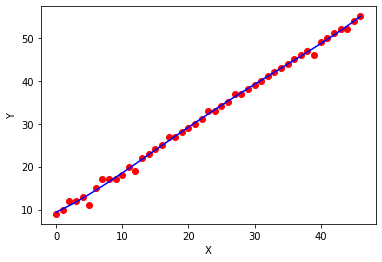

R^2: 0.9975708007054567
RMSE: 0.6703539195235853


In [36]:
pol_regression_res(X_pepe, y_pepe, 5)

#### Polynomial Regression - Order 9

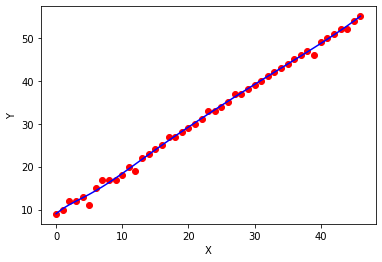

R^2: 0.9976115944058211
RMSE: 0.6647014401438442


In [37]:
pol_regression_res(X_pepe, y_pepe, 9)

#### Team - Polynomial Regression

In [38]:
from IPython.display import Image

In [39]:
X_team = df_team[['X']]
y_team = df_team['y']

#### Polynomial Regression - Order 2

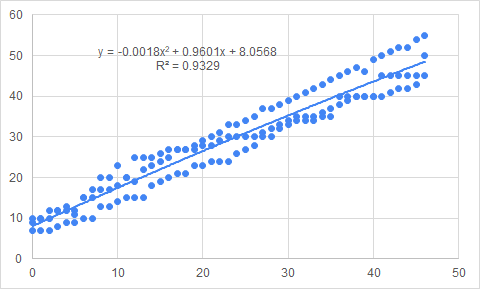

In [40]:
Image(filename='./imgs/pol_regression_order2.png') 

#### Polynomial Regression - Order 3

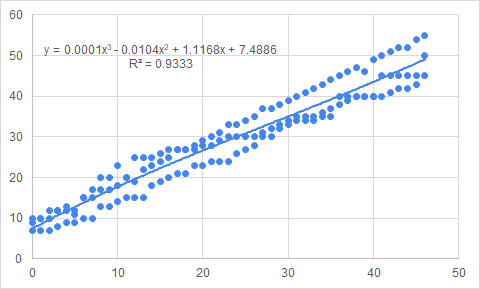

In [41]:
Image(filename='./imgs/pol_regression_order3.png') 

#### Polynomial Regression - Order 5

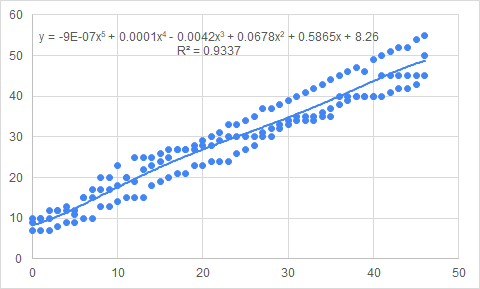

In [42]:
Image(filename='./imgs/pol_regression_order5.png') 

## Non-Linear Model - Exponential Regression

In [43]:
from scipy.optimize import curve_fit

In [44]:
# Model function
def func(x, a, b):
    return a * np.exp(b * x)

In [45]:
# Algorithm exponential regression
def exponential_regression(xdata, ydata):   
    # Constrain the optimization to the region of
    # 0 <= a <= a_limit, 0 <= b <= b_limit
    
    # Guess a_limit
    a_limit = 13.0
    # Guess b_limit
    b_limit = 0.04
    
    # Guess values
    return curve_fit(func, xdata, ydata, bounds=(0, [a_limit, b_limit]))

In [46]:
# Visualizing the Exponential Regression results    
def viz_exp_regression(xdata, ydata, popt):
    fig, axe = plt.subplots()
    axe.scatter(xdata, ydata, color='red')
    axe.plot(xdata, func(xdata, *popt), 'b--',
             label='fit: a=%5.5f, b=%5.5f, ' % tuple(popt))

In [47]:
# Stats exponential regression
def stats_exp_regression(xdata, ydata, popt):
    residuals = ydata - func(xdata, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('R^2:', r_squared)

In [48]:
# Final result of exponential regression
def res_exp_regression(x_tag, y_tag, data_ref):
    xdata = data_ref[x_tag]
    ydata = data_ref[y_tag]
    
    popt, pcov = exponential_regression(xdata, ydata)
    
    viz_exp_regression(xdata, ydata, popt)
    
    stats_exp_regression(xdata, ydata, popt)

#### Efren - Individual Exponential Regression

R^2: 0.9462086159381102


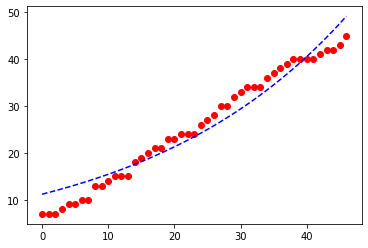

In [49]:
res_exp_regression('X', 'Efren', df)

#### Robert - Individual Exponential Regression

R^2: 0.900708997344754


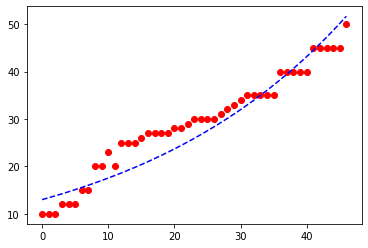

In [50]:
res_exp_regression('X', 'Robert', df)

#### Pepe - Individual Exponential Regression

R^2: 0.9497005705992895


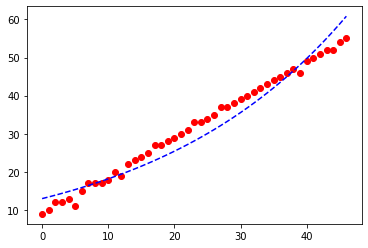

In [51]:
res_exp_regression('X', 'Pepe', df)

#### Team - Exponential Regression

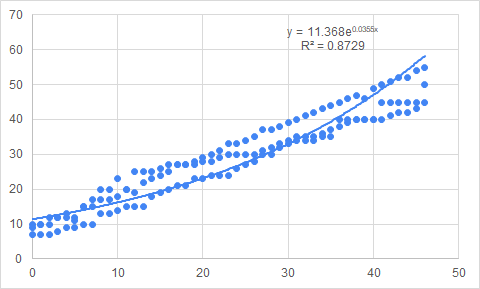

In [52]:
Image(filename='./imgs/exp_regression.png') 

## Non-Linear Model - Power Regression

Instad of this equation: $$y = a*x^b$$

Take the natural log of both sides: $$\ln y = \ln a + b * \ln x$$

This is a linear equation in [ln(x), ln(y)] with slope b and intercept ln(a).
We will use this approach because it is more straightforward

In [53]:
from scipy import stats

In [54]:
# Make a copy of data
df_ln = df
df_team_ln = df_team

In [55]:
func = lambda a : a + 1

# Apply natural logarithm ln(f) to each column
df_ln['X'] = func(df_ln['X'])
df_ln['X'] = np.log(df_ln['X'])
df_ln['Efren'] = np.log(df_ln['Efren'])
df_ln['Robert'] = np.log(df_ln['Robert'])
df_ln['Pepe'] = np.log(df_ln['Pepe'])

df_team_ln['X'] = func(df_team_ln['X'])
df_team_ln['X'] = np.log(df_team_ln['X'])
df_team_ln['y'] = np.log(df_team_ln['y'])

In [56]:
# Show first five values
df_ln.head()

,X,Date,Efren,Robert,Pepe
0,0.000000,15/04/2020,1.945910,2.302585,2.197225
1,0.693147,16/04/2020,1.945910,2.302585,2.302585
2,1.098612,17/04/2020,1.945910,2.302585,2.484907
3,1.386294,18/04/2020,2.079442,2.484907,2.484907
4,1.609438,19/04/2020,2.197225,2.484907,2.564949


In [57]:
# Show first five values
df_team_ln.head()

,X,y
0,0.000000,1.945910
1,0.693147,1.945910
2,1.098612,1.945910
3,1.386294,2.079442
4,1.609438,2.197225


In [58]:
def power_regression(x_tag, y_tag, data_ref):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_ref[x_tag], data_ref[y_tag])
    
    # use line_kws to set line label for legend
    ax = sns.regplot(x=x_tag, y=y_tag, data=data_ref, color='b', 
     line_kws={'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})

    # plot legend
    ax.legend()

    plt.show()
    
    # linear stats
    print("R^2: ", r_value**2)
    print("Standard error: ", std_err)
    print("P value: ", p_value)

#### Efren - Individual Power Regression

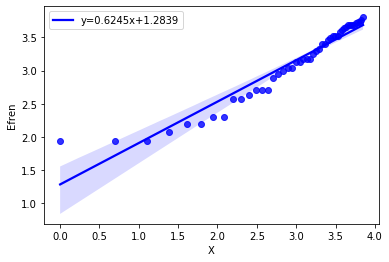

R^2:  0.9340579693524341
Standard error:  0.024734693264814527
P value:  3.297892104863276e-28


In [59]:
power_regression('X', 'Efren', df_ln)

#### Robert - Individual Power Regression

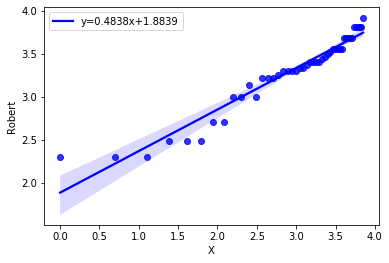

R^2:  0.9446462697496366
Standard error:  0.01745691352366334
P value:  6.390750763347904e-30


In [60]:
power_regression('X', 'Robert', df_ln)

#### Pepe - Individual Power Regression

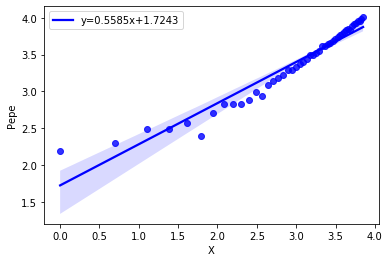

R^2:  0.9402372651523548
Standard error:  0.02099125300695181
P value:  3.592547358048763e-29


In [61]:
power_regression('X', 'Pepe', df_ln)

#### Team - Power Regression

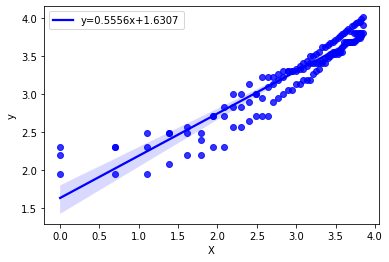

R^2:  0.889460584597622
Standard error:  0.016612852939357253
P value:  2.394137608346044e-68


In [62]:
power_regression('X', 'y', df_team_ln)